# Churn Case Study

## Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]


<img src="https://images.pexels.com/photos/3078/home-dialer-siemens-telephone.jpg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style="width:400px">

**Client**: Telco Company in the USA offering triple play (phone, internet and TV).

They want a better way to spot potential churning customers and suggested actions what to do.

## Business problem

#### Stakeholder:

- Sales/customer retention department
- Non-technical stakeholder

#### True business problem:

- predict whether a customer churns in the next month or not
- explore trends that lead to customer churn 
    - explore our FEATURES - both before modeling, and using feature importances 

#### Deliverables: Inference or Prediction?

- let's try to balance both 
    - we'll balance complexiy with interpretability

#### Context:

- **False negative** model predicts churn, but they stay
    - **Outcome**: waste time/money/effort - might get some customers used to special treatment, which could drive them away when that stops 
- **False positive** model predicts stay, but they churn
    - **Outcome**: customer is gone, and we did nothing to stop them 
    
Would prefer reducing **false positives** over false negatives 

### Evaluation Metric
Which metric would make sense to primarily use as we evaluate our models?

- **Accuracy** - balances the two kinds of errors (but is impractical with imbalanced targets)
- **Precision** - helps reduce false positives 
- Recall - helps reduce false negatives 
- F1-Score - balances recall & precision (and is beter than accuracy with imbalaced targets)
- **ROC-AUC** - helps focus on better probability outputs (makes sure our predicted probabilities are better)

## Data Understanding

In [1]:
# Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
url_link = 'https://docs.google.com/spreadsheets/d/1TAWfdKnWYiCzKUeDyGL6NzIOv7AxFt_Sfzzax464_FQ/export?format=csv&gid=882919979'
telco = pd.read_csv(url_link)

telco = telco.dropna()

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    telco.drop(columns=['customerID','Churn']), 
    np.where(telco.Churn =="Yes", 1, 0),
    test_size=0.33, random_state=42)


In [3]:
X_train.head()

gender  SeniorCitizen MaritalStatus Dependents  tenure PhoneService  \
3138    Male              0            No         No       1          Yes   
626     Male              0           Yes        Yes      58          Yes   
347     Male              0           Yes        Yes       1          Yes   
2130    Male              0            No         No       4          Yes   
2047  Female              0            No         No       1          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
3138            No              No  No internet service  No internet service   
626             No     Fiber optic                   No                  Yes   
347             No              No  No internet service  No internet service   
2130            No     Fiber optic                   No                   No   
2047            No              No  No internet service  No internet service   

      ... TotalEveCalls TotalNightMinutes TotalNightCalls TotalIntlMinutes  \
3138  ...            85             261.6             105             12.4   
626   ...           108             183.8              77             11.8   
347   ...            92             185.3             120              7.6   
2130  ...           142             107.3              84             12.2   
2047  ...           128             186.0              83              7.4   

     TotalIntlCalls CustomerServiceCalls TotalCall TotalHighBandwidthMinutes  \
3138              5                    0       283                         0   
626               7                    1       273                      2689   
347               3                    1       344                         0   
2130              2                    0       306                       666   
2047              3                    0       291                         0   

     TotalHighLatencyMinutes  TotalRevenue  
3138                       0          19.1  
626                      161        5305.1  
347                        0          19.9  
2130                     173         299.2  
2047                       0          19.8  

[5 rows x 33 columns]

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 3138 to 3179
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     2229 non-null   object 
 1   SeniorCitizen              2229 non-null   int64  
 2   MaritalStatus              2229 non-null   object 
 3   Dependents                 2229 non-null   object 
 4   tenure                     2229 non-null   int64  
 5   PhoneService               2229 non-null   object 
 6   MultipleLines              2229 non-null   object 
 7   InternetService            2229 non-null   object 
 8   OnlineSecurity             2229 non-null   object 
 9   OnlineBackup               2229 non-null   object 
 10  DeviceProtection           2229 non-null   object 
 11  TechSupport                2229 non-null   object 
 12  StreamingTV                2229 non-null   object 
 13  StreamingMovies            2229 non-null   ob

In [5]:
X_train.describe()

SeniorCitizen       tenure  NumbervMailMessages  TotalDayMinutes  \
count    2229.000000  2229.000000          2229.000000      2229.000000   
mean        0.105877    28.087483             7.863616       179.493315   
std         0.307749    23.296311            13.569929        54.844475   
min         0.000000     1.000000             0.000000         0.000000   
25%         0.000000     7.000000             0.000000       143.600000   
50%         0.000000    23.000000             0.000000       179.200000   
75%         0.000000    48.000000            18.000000       216.600000   
max         1.000000    72.000000            51.000000       346.800000   

       TotalDayCalls  TotalEveMinutes  TotalEveCalls  TotalNightMinutes  \
count    2229.000000      2229.000000    2229.000000        2229.000000   
mean      100.617766       201.778645     100.579632         199.837012   
std        20.119285        51.042977      19.744157          50.245927   
min         0.000000        31.200000      36.000000          23.200000   
25%        88.000000       166.900000      87.000000         166.300000   
50%       101.000000       201.000000     101.000000         199.700000   
75%       114.000000       236.400000     114.000000         234.500000   
max       165.000000       363.700000     168.000000         381.900000   

       TotalNightCalls  TotalIntlMinutes  TotalIntlCalls  \
count      2229.000000       2229.000000     2229.000000   
mean        100.050695         10.282279        4.499776   
std          19.416595          2.774424        2.474398   
min          33.000000          0.000000        0.000000   
25%          87.000000          8.600000        3.000000   
50%         100.000000         10.300000        4.000000   
75%         113.000000         12.100000        6.000000   
max         175.000000         20.000000       20.000000   

       CustomerServiceCalls    TotalCall  TotalHighBandwidthMinutes  \
count           2229.000000  2229.000000                2229.000000   
mean               1.559892   307.307761                 537.415882   
std                1.324275    34.304600                 803.635181   
min                0.000000   194.000000                   0.000000   
25%                1.000000   284.000000                   0.000000   
50%                1.000000   308.000000                 167.000000   
75%                2.000000   330.000000                 625.000000   
max                9.000000   404.000000                2998.000000   

       TotalHighLatencyMinutes  TotalRevenue  
count              2229.000000   2229.000000  
mean                 86.786003   1667.763122  
std                 156.276844   1926.311521  
min                   0.000000     18.800000  
25%                   0.000000    246.700000  
50%                  18.000000    892.700000  
75%                  84.000000   2416.100000  
max                1001.000000   8476.500000

In [6]:
X_train.describe(include='O')

gender MaritalStatus Dependents PhoneService MultipleLines  \
count    2229          2229       2229         2229          2229   
unique      2             2          2            1             2   
top      Male            No         No          Yes            No   
freq     1138          1232       1488         2229          2022   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             2229           2229         2229             2229   
unique               3              3            3                3   
top                 No             No           No               No   
freq               803            902          850              880   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         2229        2229            2229            2229   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq           892         845             823            1185   

       PaperlessBilling PaymentMethod InternationalPlan VoiceMailPlan  
count              2229          2229              2229          2229  
unique                2             4                 2             2  
top                 Yes  Mailed check                No            No  
freq               1139           714              2005          1629

In [7]:
# Make a full dataset of training data to explore relationships with target
train_df = X_train.copy()
train_df['Churn'] = y_train

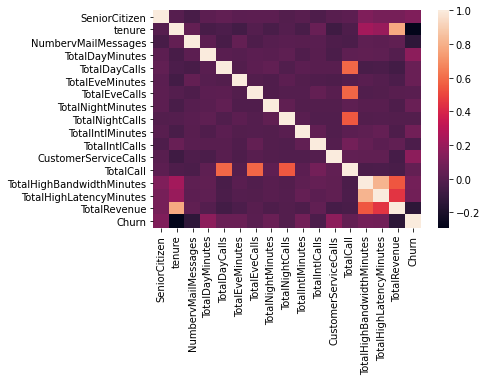

In [8]:
sns.heatmap(train_df.corr());

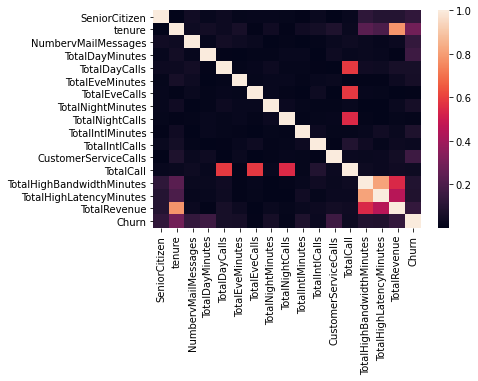

In [9]:
sns.heatmap(abs(train_df.corr()));

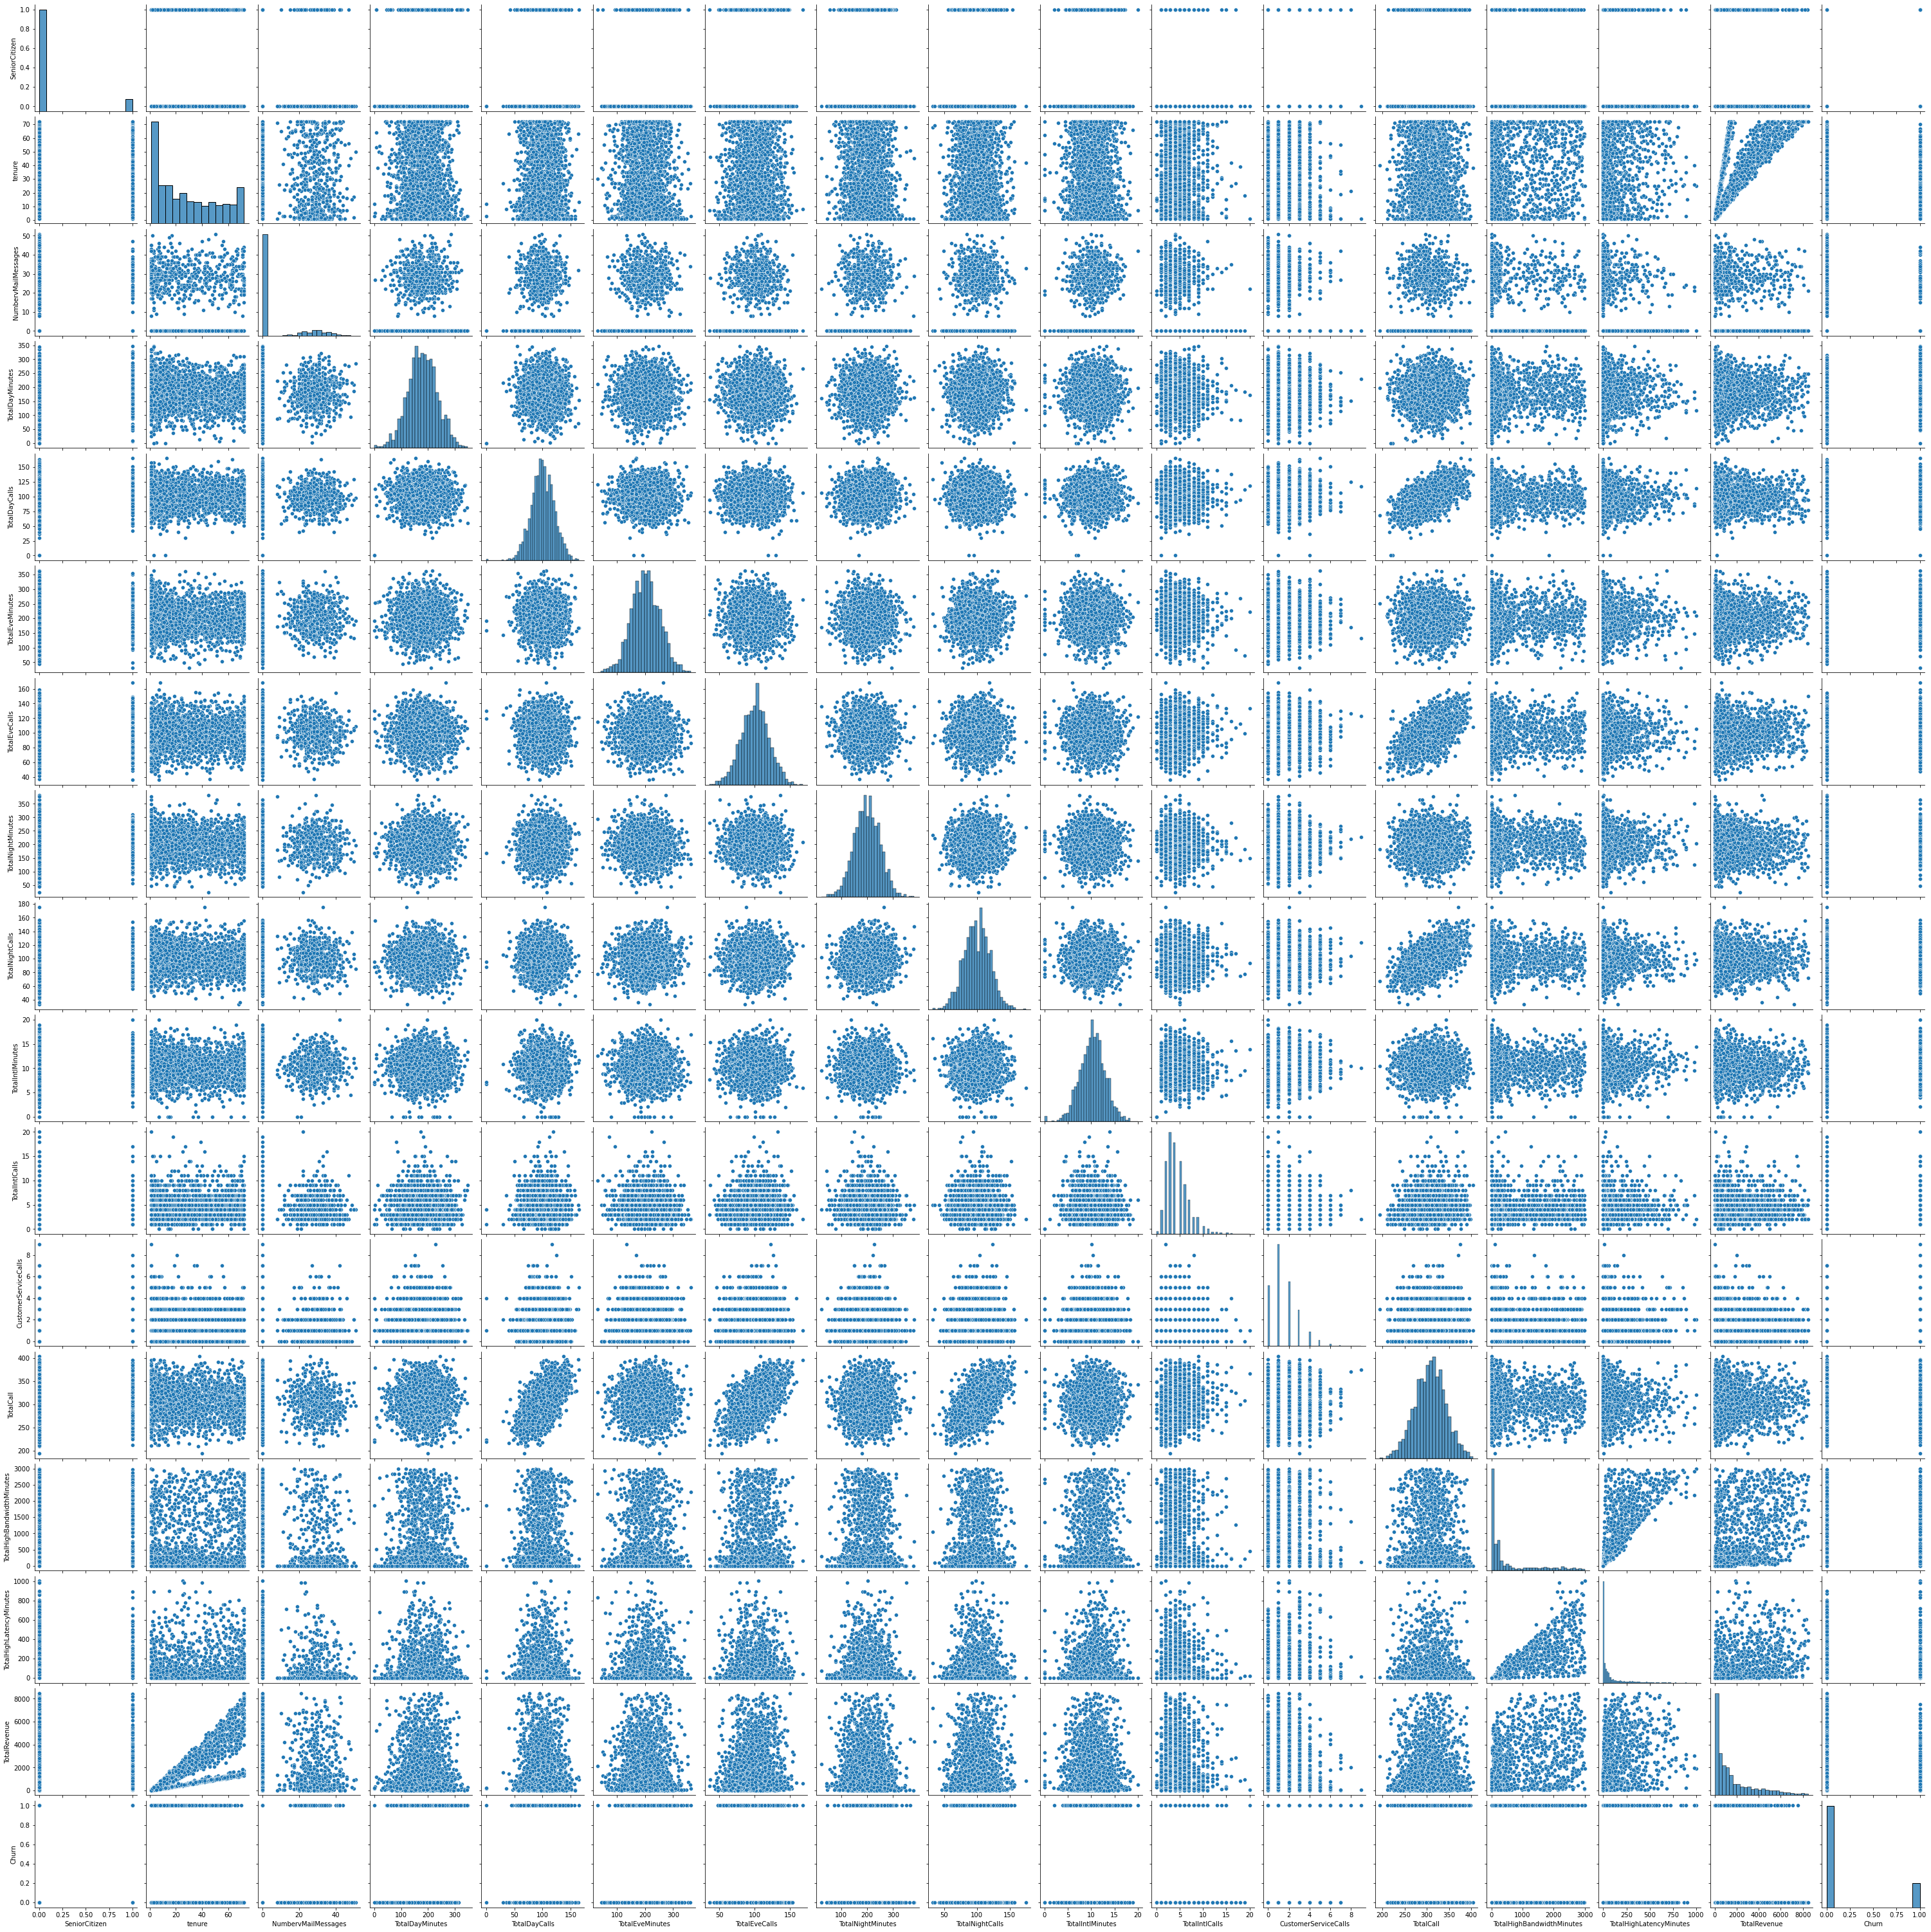

In [10]:
sns.pairplot(train_df);

### EDA Observations:

Any initial findings?

- ' tenure' might be useful
- multicollinearity (calls)
- totals aren't divided by tenure
- 'phone service' was all the same value (not useful)


Any ideas for feature engineering come to mind?

- drop some 'total call' columns, drop 'phone service'
- might want to divide totals by tenure


## Data Processing

### Describe Necessary Preprocessing Steps

- drop unnecessary colums - might help with obvious multicollinearity
- one hot encode for string columns 
- scale (for linear models)


In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 3138 to 3179
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     2229 non-null   object 
 1   SeniorCitizen              2229 non-null   int64  
 2   MaritalStatus              2229 non-null   object 
 3   Dependents                 2229 non-null   object 
 4   tenure                     2229 non-null   int64  
 5   PhoneService               2229 non-null   object 
 6   MultipleLines              2229 non-null   object 
 7   InternetService            2229 non-null   object 
 8   OnlineSecurity             2229 non-null   object 
 9   OnlineBackup               2229 non-null   object 
 10  DeviceProtection           2229 non-null   object 
 11  TechSupport                2229 non-null   object 
 12  StreamingTV                2229 non-null   object 
 13  StreamingMovies            2229 non-null   ob

In [12]:
# Imports
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Probably need more imports than just these!
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [13]:
X_train['VoiceMailPlan'].dtype

dtype('O')

In [14]:
cat_columns = [c for c in X_train.columns if X_train[c].dtype == 'O']
cat_columns.remove('PhoneService')

len(cat_columns)

16

In [15]:
[c for c in X_train.columns if X_train[c].dtype in ['int64', 'float64']]

['SeniorCitizen',
 'tenure',
 'NumbervMailMessages',
 'TotalDayMinutes',
 'TotalDayCalls',
 'TotalEveMinutes',
 'TotalEveCalls',
 'TotalNightMinutes',
 'TotalNightCalls',
 'TotalIntlMinutes',
 'TotalIntlCalls',
 'CustomerServiceCalls',
 'TotalCall',
 'TotalHighBandwidthMinutes',
 'TotalHighLatencyMinutes',
 'TotalRevenue']

In [16]:
num_columns = [
    'SeniorCitizen',
     'tenure',
     'NumbervMailMessages',
     'TotalDayMinutes',
     'TotalEveMinutes',
     'TotalNightMinutes',
     'TotalIntlMinutes',
     'CustomerServiceCalls',
     'TotalCall',
     'TotalHighBandwidthMinutes',
     'TotalHighLatencyMinutes',
     'TotalRevenue']
len(num_columns)

12

In [17]:
for c in num_columns:
    print(X_train[c].dtype)

int64
int64
int64
float64
float64
float64
float64
int64
int64
int64
int64
float64


In [18]:
# * = unpacks all of the elements inside of the lists into one list
used_cols = [*cat_columns, *num_columns]
used_cols

['gender',
 'MaritalStatus',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'InternationalPlan',
 'VoiceMailPlan',
 'SeniorCitizen',
 'tenure',
 'NumbervMailMessages',
 'TotalDayMinutes',
 'TotalEveMinutes',
 'TotalNightMinutes',
 'TotalIntlMinutes',
 'CustomerServiceCalls',
 'TotalCall',
 'TotalHighBandwidthMinutes',
 'TotalHighLatencyMinutes',
 'TotalRevenue']

In [19]:
cat_transformer = OneHotEncoder(drop='first')

num_transformer = StandardScaler()

In [20]:
preprocessor = ColumnTransformer([
    ('cats', cat_transformer, cat_columns),
    ('nums', num_transformer, num_columns)
])

## Initial Modeling

### Model-less Baseline

In [21]:
pd.Series(y_train).value_counts(normalize=True)

0    0.808883
1    0.191117
dtype: float64

#### Evaluate:

- if we predict that no one churns, we'd be right about 80% of the time
- class imbalance - imbalanced target!


In [22]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import f1_score, precision_score, roc_auc_score

### Model 1: 

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf_dt = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=10))
])

clf_dt.fit(X_train[used_cols], y_train)

train_preds = clf_dt.predict(X_train[used_cols])
test_preds = clf_dt.predict(X_test[used_cols])

train_probas = clf_dt.predict_proba(X_train[used_cols])[:,1]
test_probas = clf_dt.predict_proba(X_test[used_cols])[:,1]

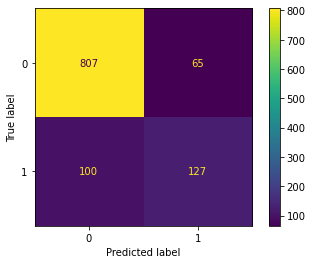

In [25]:
plot_confusion_matrix(clf_dt, X_test[used_cols], y_test);

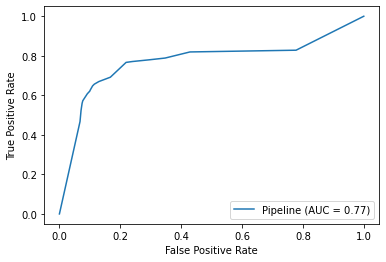

In [26]:
plot_roc_curve(clf_dt, X_test[used_cols], y_test);

In [27]:
print(f"Train F1: {f1_score(y_train, train_preds):.4f}")
print(f"Train Precision: {precision_score(y_train, train_preds):.4f}")
print(f"Train ROC-AUC: {roc_auc_score(y_train, train_probas):.4f}")
print("*" * 20)
print(f"Test F1: {f1_score(y_test, test_preds):.4f}")
print(f"Test Precision: {precision_score(y_test, test_preds):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, test_probas):.4f}")

Train F1: 0.9086
Train Precision: 0.9890
Train ROC-AUC: 0.9841
********************
Test F1: 0.6062
Test Precision: 0.6615
Test ROC-AUC: 0.7731


In [28]:
def evaluate(model, Xtr, Xte, ytr, yte):
    train_preds = model.predict(Xtr)
    test_preds = model.predict(Xte)

    train_probas = model.predict_proba(Xtr)[:,1]
    test_probas = model.predict_proba(Xtr)[:,1]
    
    plot_confusion_matrix(model, Xte, yte)
    
    plot_roc_curve(model, Xte, yte)
    
    print(f"Train F1: {f1_score(y_train, train_preds):.4f}")
    print(f"Train Precision: {precision_score(y_train, train_preds):.4f}")
    print(f"Train ROC-AUC: {roc_auc_score(y_train, train_probas):.4f}")
    print("*" * 20)
    print(f"Test F1: {f1_score(y_test, test_preds):.4f}")
    print(f"Test Precision: {precision_score(y_test, test_preds):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(y_test, test_probas):.4f}")

#### Evaluate:

- DTs would work well if: 
    - lots of categorical columns
    - columns have nonlinear relationship with target, or interaction terms
    
Is a decision tree a good fit for this data or this business problem?
- it's an okay fit - could tune or add complexity to reduce overfitting, plus dts work well with complex people data (lots of interactions)


### Model 2: 

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

clf_lr.fit(X_train[used_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cats',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'MaritalStatus',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'Payme

Train F1: 0.6035
Train Precision: 0.7125
Train ROC-AUC: 0.9106
********************
Test F1: 0.5835
Test Precision: 0.6724


ValueError: Found input variables with inconsistent numbers of samples: [1099, 2229]

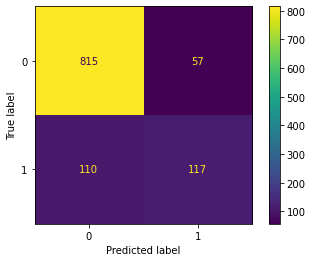

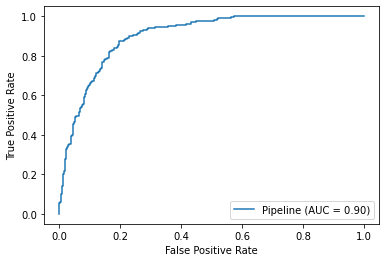

In [31]:
evaluate(clf_lr, X_train[used_cols], X_test[used_cols], y_train,y_test)

#### Evaluate:

Logreg would work well if:
- linear relationship between inputs and target

Is LR a good fit?
- not overfitting, that's good!
- but... probably underfit - would probably take some good feature engineering to get my false positives down
- BUT good roc-auc - could just need to adjust threshold

### Model 3: Naive Bayes

In [32]:
from sklearn.naive_bayes import ComplementNB, GaussianNB

In [33]:
clf_nb = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('bayes', GaussianNB)
])

clf_nb.fit(X_train[used_cols], y_train)

TypeError: fit() missing 1 required positional argument: 'y'

In [34]:
evaluate(clf_nb, X_train[used_cols], X_test[used_cols], y_train, y_test)

TypeError: predict() missing 1 required positional argument: 'X'

#### Evaluate:

- NB is good if a lot of input features, especially a lot of categories (one hot encoded columns)

Good choice here? Probably not


## Model Choice - Then Iterate!

What initial model currently best describes our data?

- DT
- accounting for nonlinearities (like interactions) better


What model do we think would be the best fit for our business problem/data?

- can probably tune a DT quicker than feature engineering for logreg/


Do we have any constraints? As in, do we need to have a simpler or more interpretable model for any reason?

- not necessarily - want good predictions AND to understand why 



### Iterate!

After choosing our best simple model, let's explore better hyperparameters or a more complex version to improve our predictions!


Next steps would look like:

- Grid search for optimal hyperparameters for DT
- Try ensemble methods - and then tune those

In [35]:
from sklearn.ensemble import RandomForestClassifier

Train F1: 0.9051
Train Precision: 0.9972
Train ROC-AUC: 0.9988
********************
Test F1: 0.5922
Test Precision: 0.8092


ValueError: Found input variables with inconsistent numbers of samples: [1099, 2229]

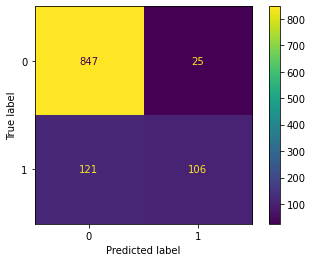

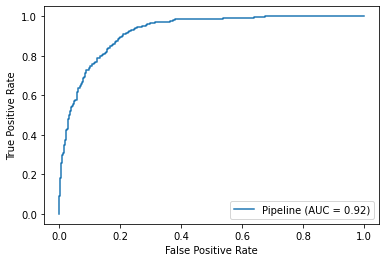

In [36]:
clf_rf = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('rf',RandomForestClassifier(random_state=42, max_depth=10))
])

clf_rf.fit(X_train[used_cols], y_train)

evaluate(clf_rf, X_train[used_cols], X_test[used_cols], y_train, y_test)

In [ ]:
clf_rf

# Easy Way `.coef_` or  `.feature_importances_`

In [ ]:
clf_rf.named_steps['rf'].feature_importances_

In [ ]:
cat_pr_cols = clf_rf['preprocessor'].named_transformers_['cats'].get_feature_names()

In [ ]:
dict(zip([*cat_pr_cols, *num_columns], clf_rf.named_steps['rf'].feature_importances_))

# Another Way: Recursive Feature Elimination(or any method of feature selection)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
X_tr_pr = preprocessor.fit_transform(X_train[used_cols])
X_te_pr = preprocessor.transform(X_test[used_cols])

In [ ]:
rf = RandomForestClassifier(random_state=42, max_depth=10)

rfe = RFE(rf, n_features_to_select=10)

rfe.fit(X_tr_pr, y_train)

In [ ]:
rfe.ranking_
# the ones with 1 = features it would select
# the ones less than 1 = features it would not select

In [ ]:
dict(zip([*cat_pr_cols, *num_columns], rfe.ranking_))

# Can Also Use: Permutation Importance

** Does not work for binary data **

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
rf.fit(X_tr_pr, y_train)

results = permutation_importance(rf, X_te_pr, y_test, random_state=42)

In [ ]:
dict(zip([]))

In [ ]:
for i in results.importances_mean.argsort

# Lastly: SHAP Values!

In [37]:
import shap

In [38]:
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values

In [ ]:
shap.force_plot(explainer.expected_value[1],
               shap_values[1][:1000, :],
               pd.DataFrame(X_te_pr, columns=[*ca]))

In [ ]:
xgbr = xgb.XGBRegressor(random_state=42)

xgbr.fit(x_train2, y_train2)

In [ ]:
xgbr.score(x_test2, y_test2)